<a href="https://colab.research.google.com/github/laroccathebrux/-DS-StockPricePrediction/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df = web.DataReader('PETR4.SA', data_source='yahoo', start='2010-01-01', end='2020-11-01')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,37.320000,36.820000,36.950001,37.320000,13303600.0,29.089407
2010-01-05,37.430000,36.799999,37.380001,37.000000,21396400.0,28.839991
2010-01-06,37.500000,36.799999,36.799999,37.500000,18720600.0,29.229712
2010-01-07,37.450001,37.070000,37.270000,37.150002,10964600.0,28.956902
2010-01-08,37.389999,36.860001,37.160000,36.950001,14624200.0,28.801014
...,...,...,...,...,...,...
2020-10-26,20.530001,20.030001,20.330000,20.250000,58229100.0,20.250000
2020-10-27,20.370001,19.809999,20.260000,19.879999,48978400.0,19.879999
2020-10-28,19.440001,18.670000,19.350000,18.670000,79247400.0,18.670000


In [3]:
#get the number of rows and columns in the data set
df.shape

(2686, 6)

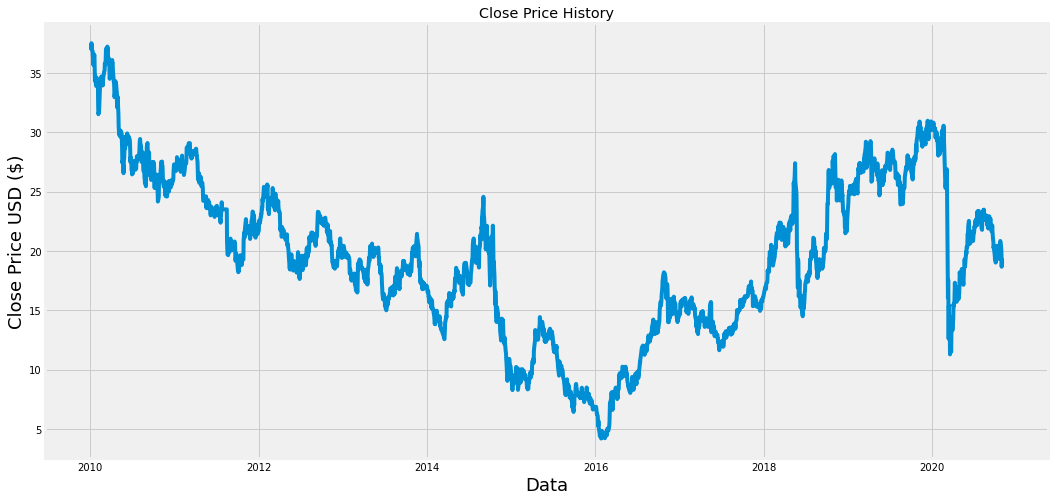

In [4]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Data', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [5]:
# Create a new dataframe with only the Close Column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

2149

In [6]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.99459459],
       [0.98498499],
       [1.        ],
       ...,
       [0.43453454],
       [0.45315318],
       [0.44264266]])

In [7]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.99459459, 0.98498499, 1.        , 0.98948954, 0.98348351,
       0.97987993, 0.96576578, 0.96396394, 0.94504499, 0.94744745,
       0.97147145, 0.9663664 , 0.93843846, 0.90480486, 0.91741742,
       0.89189194, 0.89819822, 0.91321323, 0.89999995, 0.90390388,
       0.89789785, 0.89609612, 0.84384382, 0.82042044, 0.82702702,
       0.84204209, 0.85405404, 0.87567569, 0.88888887, 0.9024024 ,
       0.91561557, 0.90540536, 0.91441446, 0.90060056, 0.89309305,
       0.90630634, 0.91321323, 0.92282283, 0.9285285 , 0.92942948,
       0.93093095, 0.94924929, 0.94594597, 0.96996997, 0.98498499,
       0.98648646, 0.98678683, 0.97807809, 0.99129126, 0.98948954,
       0.9855856 , 0.96186185, 0.96216221, 0.94954954, 0.95765766,
       0.93093095, 0.90990991, 0.92192197, 0.9189189 , 0.93663662])]
[0.9474474477484566]

[array([0.99459459, 0.98498499, 1.        , 0.98948954, 0.98348351,
       0.97987993, 0.96576578, 0.96396394, 0.94504499, 0.94744745,
       0.97147145, 0.9663664 , 0.938

In [8]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [9]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2089, 60, 1)

In [10]:
#build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [11]:
#compile the model
model.compile(optimizer='Adam', loss='mean_squared_error')

In [12]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2089/2089 [==============================] - 48s 22ms/step - loss: 0.0032


In [13]:
# Create the testing data set
#create a new array containing scaled values from index 1718 to end
test_data = scaled_data[training_data_len - 60: , :]
# create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])


In [14]:
# Convert the data to a numpy array
x_test = np.array(x_test)


In [15]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [16]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [17]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test)**2)))
rmse

1.1362053213370862

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


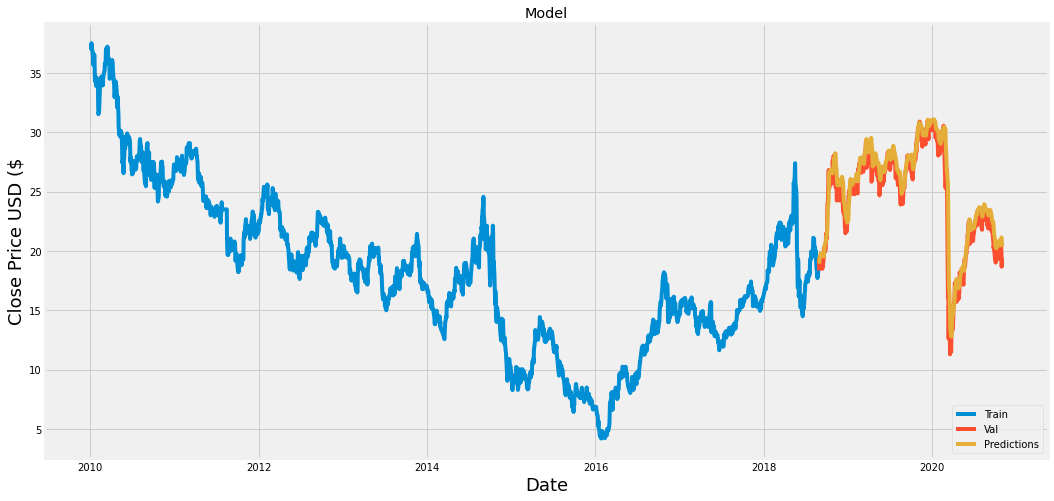

In [18]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [19]:
#Show de valid and predicted prices
valid

,Close,Predictions
Date,,
2018-08-28,18.350000,18.928625
2018-08-29,19.299999,19.031507
2018-08-30,18.799999,19.305212
2018-08-31,19.260000,19.488121
2018-09-03,19.000000,19.694498
...,...,...
2020-10-26,20.250000,21.057236
2020-10-27,19.879999,21.140219
2020-10-28,18.670000,21.064665


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model.save('/content/drive/My Drive/Stock/TESTE.model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/drive/My Drive/Stock/DELL.model/assets


In [20]:
# Get the quote 
stock_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2020-10-30')
#Create a new dataframe
new_df = stock_quote.filter(['Close'])
#Get the last 60 day closing price values and convert tthe dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be value between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#create an empty list
X_test = []
#Append the past 60 days 
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[91.22192]]


In [21]:
stock_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2020-10-30', end='2020-10-30')
print(stock_quote2['Open'])
print(stock_quote2['High'])
print(stock_quote2['Low'])
print(stock_quote2['Close'])

Date
2020-10-30    111.059998
Name: Open, dtype: float64
Date
2020-10-30    111.989998
Name: High, dtype: float64
Date
2020-10-30    107.720001
Name: Low, dtype: float64
Date
2020-10-30    108.860001
Name: Close, dtype: float64


In [22]:
openValue = stock_quote2['Open'][0]
for price in pred_price:
  variation = price-openValue
  print(variation)
  if price > openValue and abs(variation) > 0.8:
    print('Compra')
  elif price > openValue and abs(variation) < 0.8:
    print('Nada')
  elif price < openValue and abs(variation) > 0.8:
    print('Venda')
  elif price < openValue and abs(variation) < 0.8: 
    print('Nada')

[-19.838081]
Venda
